 Loading yolo metrics in csv
DONE
done
 numer of iterations: 116
 best accurecy box 73.644 at epoch 24
 best accurecy obj 96.6013 at epoch 22
 best accurecy cls 97.59 at epoch 6
 best accurecy 89.1582 at epoch 24


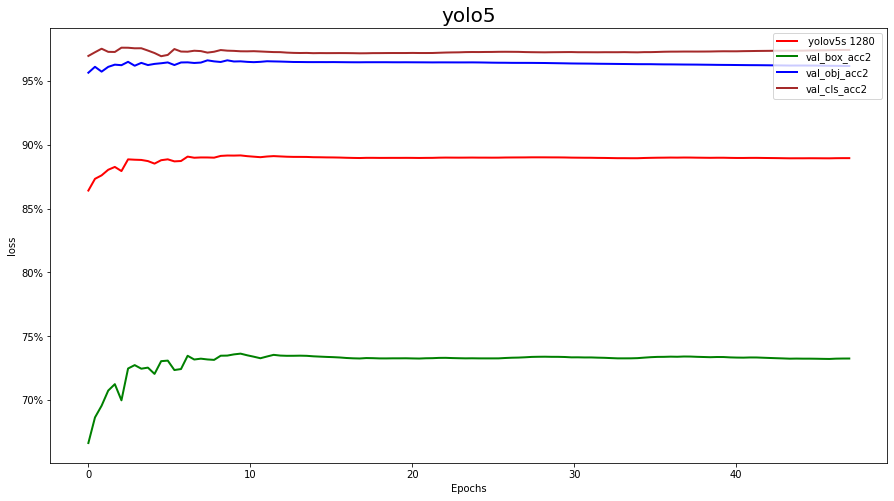

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as mtick
import matplotlib
from matplotlib.pyplot import figure
from matplotlib.colors import ListedColormap


data_path_csv = './data/results2.csv'

import os 
import csv

data_path = './data'
jsonn_file = 'metrics.json'

num_found_files = 0

for file in os.listdir(data_path):
    if 'results2.csv' in file:
        print(' Loading yolo metrics in csv')
        num_found_files = num_found_files + 1
#         csv_path = os.path.join(data_path, file)
        csv_path = data_path_csv

        
        dics = {}
        val_box_loss = []
        val_obj_loss = []
        val_cls_loss = []
        with open(csv_path, newline='') as file:
            reader = csv.reader(file)
            for row in reader:
                val_box_loss.append(row[8])
                val_obj_loss.append(row[9])
                val_cls_loss.append(row[10])
        dics_key1 = val_box_loss[0]
        dics_key2 = val_obj_loss[0]
        dics_key3 = val_cls_loss[0]
        val_box_loss.pop(0)
        val_obj_loss.pop(0)
        val_cls_loss.pop(0)
        dics[dics_key1] = val_box_loss
        dics[dics_key2] = val_obj_loss
        dics[dics_key3] = val_cls_loss



#         print(f' dic   {dics}')

#         print(f' dic key boxx  {dics_key}')
#         print(f' dic val boxx  {dic_value}')    

            
        print('DONE')

avg_loss = []
nn_all = []
mm = 0

for a, b, c in zip(val_box_loss, val_obj_loss, val_cls_loss):
    avg = (float(a) + float(b) + float(c))/3
    avg_loss.append(100 - avg*1000)
    mm = mm + 1
    nn_all.append(mm)
# print(f'avg_loss {avg_loss} ')
print('done')
print(f' numer of iterations: {len(nn_all)}')

val_box_loss2 = []
val_obj_loss2 = []
val_cls_loss2 = []

for a, b, c in zip(val_box_loss, val_obj_loss, val_cls_loss):
    val_box_loss2.append(100 - float(a)*1000)
    val_obj_loss2.append(100 - float(b)*1000)
    val_cls_loss2.append(100 - float(c)*1000)

        

for nn, ac1 in zip(nn_all, val_box_loss2):
    if ac1 == max(val_box_loss2):
        print(f' best accurecy box { ac1 } at epoch {nn}')

for nn, ac2 in zip(nn_all, val_obj_loss2):
    if ac2 == max(val_obj_loss2):
        print(f' best accurecy obj { ac2 } at epoch {nn}')

for nn, ac1 in zip(nn_all, val_cls_loss2):
    if ac1 == max(val_cls_loss2):
        print(f' best accurecy cls { ac1 } at epoch {nn}')
        
for nn, ac in zip(nn_all, avg_loss):
    if ac == max(avg_loss):
        print(f' best accurecy { ac } at epoch {nn}')
        
tu = tuple(avg_loss)
tu1 = tuple(val_box_loss2)
tu2 = tuple(val_obj_loss2)
tu3 = tuple(val_cls_loss2)


df2=pd.DataFrame({'x_values': np.linspace(0,47,len(np.random.randn(116))),
                 
                 'y_values': tu,
                  'y1_values': tu1,
                  'y2_values': tu2,
                  'y3_values': tu3,
#                   'y4_values': np.linspace(0,47,len(np.random.randn(116)))
                  
                                         
})

import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as mtick

fig = plt.figure(1, (15, 8))
ax = fig.add_subplot(1,1,1)

ax.plot( 'x_values', 'y_values',   data=df2, marker='', markevery=10, markersize=15, color='red', linewidth=2, label=" yolov5s 1280 ")
ax.plot( 'x_values', 'y1_values',  data=df2, marker='', markevery=1, markersize=5, color='green', linewidth=2, label="val_box_acc2")
ax.plot( 'x_values', 'y2_values',  data=df2, marker='', markevery=1, markersize=5, color='blue', linewidth=2, label="val_obj_acc2")
ax.plot( 'x_values', 'y3_values',  data=df2, marker='', markevery=1, markersize=5, color='brown', linewidth=2, label="val_cls_acc2")
# ax.plot( 'x_values', 'y4_values',  data=df2, marker='', markevery=1, markersize=5, color='white', linewidth=2, label="")

fmt = '%.0f%%' # Format you want the ticks, e.g. '40%'
xticks = mtick.FormatStrFormatter(fmt)
ax.yaxis.set_major_formatter(xticks)

plt.title('yolo5', size = 20)
plt.xlabel('Epochs')
plt.ylabel('loss')

# show legend
plt.legend(loc='upper right')

plt.show()